## Importing and Preparation of data

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [2]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
print(iris.data.shape)

(150, 4)


In [6]:
X = iris.data
y = iris.target

## Split data into training and test sets (67:33)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
print(X_train.shape)
print(X_test.shape)

(100, 4)
(50, 4)


In [9]:
print(y_train.shape)
print(y_test.shape)

(100,)
(50,)


## Using KNN for classification

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Building confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#calculating model accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy for k=3 is '+ str(accuracy * 100) + '%')

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
Model accuracy for k=3 is 98.0%


In [11]:
import numpy as np
k_list = range(1,26)
scores = {}
error = []
scores_list = []
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    
    scores[k] = accuracy_score(y_test,y_pred)
    #changing to misclassification error
    error.append(1-scores[k])
    scores_list.append(1-scores[k])
    
print(scores_list)

[0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020000000000000018, 0.0, 0.020000000000000018, 0.0]


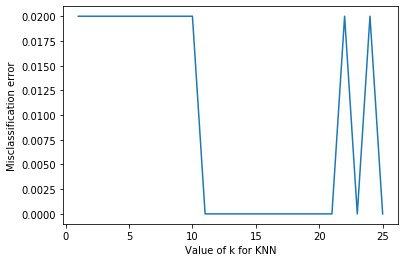

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_list,scores_list)
plt.xlabel('Value of k for KNN')
plt.ylabel('Misclassification error')

plt.show()

In [13]:
# finding best k
best_k = k_list[error.index(min(error))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 11.
